# Ensure Data are consisent and clean

## Load data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from docx import Document

In [5]:
# Load the SPSS file for survey data
survey_data, meta = pyreadstat.read_sav('part2_data.sav')

# Load the Excel file for the brand list
brand_list = pd.read_excel('part2_brandlist.xlsx')

In [6]:
survey_data.head(10)

,CID,STATUS,TERMINATION_CODE,LOCALE,Country,S01,S02_1,AgeGroups,S03axUS,S03axZA,...,P02b_10_98,P02b_10_105,P02b_10_99,P02b_10_100,P02b_10_101,P02b_10_102,P02b_10_103,P02b_10_999,P02b_10_997,P02b_10_998
0,699882399.0,3.0,2228716.0,5.0,5.0,2.0,48.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,699882401.0,2.0,NaN,5.0,5.0,2.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,699882425.0,3.0,2226504.0,5.0,5.0,2.0,30.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,699882433.0,2.0,NaN,5.0,5.0,1.0,39.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,699882439.0,3.0,2228716.0,5.0,5.0,1.0,46.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,699882567.0,2.0,NaN,5.0,5.0,1.0,48.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,699882613.0,2.0,NaN,5.0,5.0,2.0,36.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,699883000.0,2.0,NaN,5.0,5.0,1.0,40.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,699890233.0,2.0,NaN,5.0,5.0,2.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,699890263.0,2.0,NaN,5.0,5.0,1.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Columns: 1842 entries, CID to P02b_10_998
dtypes: float64(1842)
memory usage: 2.5 MB


In [8]:
brand_list.head()

,Unnamed: 0,Unnamed: 1,BRAND TO SHOW,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,IS PRIORITY BRAND,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Code,Category,USA,South Africa,Germany,Spain,UK,Poland,China,USA,South Africa,Germany,Spain,UK,Poland,China
1,1,Spirit,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,Spirit,0,0,1,1,0,1,1,0,0,1,1,0,1,1
3,3,Liqueur,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,4,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [9]:
brand_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         106 non-null    object
 1   Unnamed: 1         45 non-null     object
 2   BRAND TO SHOW      106 non-null    object
 3   Unnamed: 3         106 non-null    object
 4   Unnamed: 4         106 non-null    object
 5   Unnamed: 5         106 non-null    object
 6   Unnamed: 6         106 non-null    object
 7   Unnamed: 7         106 non-null    object
 8   Unnamed: 8         106 non-null    object
 9   IS PRIORITY BRAND  106 non-null    object
 10  Unnamed: 10        106 non-null    object
 11  Unnamed: 11        106 non-null    object
 12  Unnamed: 12        106 non-null    object
 13  Unnamed: 13        106 non-null    object
 14  Unnamed: 14        106 non-null    object
 15  Unnamed: 15        106 non-null    object
dtypes: object(16)
memory usage: 13.4+ KB


In [10]:
# Load the Word document
questionnaire = Document('part2_questionnaire.docx')

# Print the content of each paragraph to inspect the structure
for paragraph in questionnaire.paragraphs:
    print(paragraph.text)




Screener (S)
Introduction
Thank you for taking the time to participate in this market research study.

Please be assured that your responses will remain confidential and anonymous.


S01: Gender
All. Single.
What is your gender?

Female
Male
Other
Prefer not to answer

Screenout at end of screener if Pos. 4 selected.

S02: Age
All. Numeric. Max. 2 digit-number.
How old are you?

___

If answer to above question as follows, terminate directly
DE, UK, ES, POL, CN, ZA: <18
US: <21
If answer to above question > 39, Terminate at end of screener in ES, POL, CN, ZA
If answer to above question > 49, Terminate at end of screener in DE, US, UK. Quota limit of 20% for 40-49.

Age Groups (Hidden)
Auto-code from S02a.

18-29 years
30-39 years
40-49 years (show only in DE, US, UK)

S03a: Region
All. Single.
In which region do you live?

List “Region” from NativeResearch 

CN: only Tier 1 & Tier 2 regions

S03a-recode: Region (Hidden, mapping)
Broader regions acc. to excel.

S03b: Area of living
Al

## Completeness and Accuracy Check

Missing values check

In [11]:
missing_data = survey_data.isnull().sum()
missing_data

CID                   0
STATUS                0
TERMINATION_CODE     66
LOCALE                0
Country               0
                   ... 
P02b_10_102         181
P02b_10_103         181
P02b_10_999         181
P02b_10_997         181
P02b_10_998         181
Length: 1842, dtype: int64

In [12]:
print("Missing Data in Required Fields:")
print(missing_data[missing_data > 0])

Missing Data in Required Fields:
TERMINATION_CODE     66
AgeGroups             4
S03axUS             181
S03axZA             181
S03axDE             181
                   ... 
P02b_10_102         181
P02b_10_103         181
P02b_10_999         181
P02b_10_997         181
P02b_10_998         181
Length: 1836, dtype: int64


In [13]:
# Calculate the percentage of missing values for required questions
missing_percentage = survey_data.isnull().mean() * 100
print("Percentage of Missing Data in Required Questions:")
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

Percentage of Missing Data in Required Questions:


P02b_2_54    100.000000
P02b_1_76    100.000000
P02b_4_93    100.000000
P02b_4_92    100.000000
P02b_4_91    100.000000
                ...    
S05            2.209945
AgeGroups      2.209945
S03axGB        2.209945
S04xGB         2.209945
S03b           2.209945
Length: 1836, dtype: float64

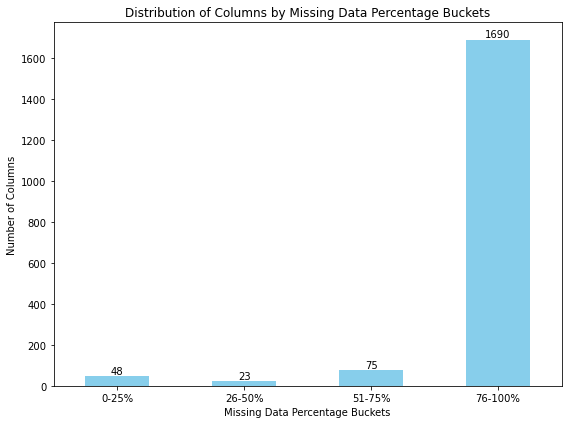

In [14]:
missing_buckets = pd.cut(missing_percentage, bins=[0, 25, 50, 75, 100], labels=['0-25%', '26-50%', '51-75%', '76-100%'])

# Count the number of columns in each bucket
bucket_counts = missing_buckets.value_counts().sort_index()

# Plot the distribution of missing data buckets
plt.figure(figsize=(8, 6))
ax = bucket_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Columns by Missing Data Percentage Buckets')
plt.xlabel('Missing Data Percentage Buckets')
plt.ylabel('Number of Columns')
plt.xticks(rotation=0)
# Add count labels on top of each bar
for i, count in enumerate(bucket_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
#print the first 10 column with high missing percentage
missing_percentage.sort_values(ascending=False).head(10)

P02b_10_998    100.0
P02b_3_65      100.0
P02b_3_76      100.0
P02b_3_74      100.0
P02b_3_73      100.0
P02b_3_72      100.0
P02b_3_71      100.0
P02b_3_69      100.0
P02b_3_68      100.0
P02b_3_67      100.0
dtype: float64

In [16]:
#how many col starting with P02b from missing_percentage?
missing_percentage[missing_percentage.index.str.startswith('P02b')].count()

1080

In [13]:
#how many col starting with P02a from missing_percentage?
missing_percentage[missing_percentage.index.str.startswith('P02a')].count()

108

### Conditional Skip logic

 from Questionnaire: if S08a = 2 --> skip P02a and P02b

In [10]:
s08a_column = [col for col in survey_data.columns if col.startswith('S08a')][0]
p02a_columns = [col for col in survey_data.columns if col.startswith('P02a')]
p02b_columns = [col for col in survey_data.columns if col.startswith('P02b')]

In [33]:
s08a_only_drinkers = survey_data[(survey_data['S08a'] == 2)]
s08a_only_drinkers

,CID,STATUS,TERMINATION_CODE,LOCALE,Country,S01,S02_1,AgeGroups,S03axUS,S03axZA,...,P02b_10_98,P02b_10_105,P02b_10_99,P02b_10_100,P02b_10_101,P02b_10_102,P02b_10_103,P02b_10_999,P02b_10_997,P02b_10_998
5,699882567.0,2.0,NaN,5.0,5.0,1.0,48.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,699890370.0,2.0,NaN,5.0,5.0,1.0,47.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,699890373.0,2.0,NaN,5.0,5.0,2.0,30.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,699890448.0,3.0,2226504.0,5.0,5.0,2.0,46.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,699890529.0,3.0,2228896.0,5.0,5.0,1.0,33.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,699890543.0,3.0,2226503.0,5.0,5.0,1.0,38.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,699891287.0,3.0,2226504.0,5.0,5.0,2.0,48.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,699895241.0,3.0,2226504.0,5.0,5.0,2.0,26.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,699896260.0,3.0,2226504.0,5.0,5.0,1.0,24.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,699897538.0,2.0,NaN,5.0,5.0,2.0,27.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
### non-null col starting with either P02a or P02b
p02_columns = p02a_columns + p02b_columns
survey_data[p02_columns].notnull().any().value_counts()

False    998
True     190
dtype: int64

In [73]:
#let's check if this condition applies also to S08a = 1
s08a1 = survey_data[(survey_data['S08a'] == 1)]
s08a1

,CID,STATUS,TERMINATION_CODE,LOCALE,Country,S01,S02_1,AgeGroups,S03axUS,S03axZA,...,P02b_10_98,P02b_10_105,P02b_10_99,P02b_10_100,P02b_10_101,P02b_10_102,P02b_10_103,P02b_10_999,P02b_10_997,P02b_10_998
99,699895561.0,3.0,2226504.0,5.0,5.0,1.0,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,699898677.0,3.0,2226503.0,5.0,5.0,2.0,23.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#let's check if this condition applies also to S08a = 3
s08a3 = survey_data[(survey_data['S08a'] == 3)]
s08a3

,CID,STATUS,TERMINATION_CODE,LOCALE,Country,S01,S02_1,AgeGroups,S03axUS,S03axZA,...,P02b_10_98,P02b_10_105,P02b_10_99,P02b_10_100,P02b_10_101,P02b_10_102,P02b_10_103,P02b_10_999,P02b_10_997,P02b_10_998
1,699882401.0,2.0,NaN,5.0,5.0,2.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,699882425.0,3.0,2226504.0,5.0,5.0,2.0,30.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,699882433.0,2.0,NaN,5.0,5.0,1.0,39.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,699882613.0,2.0,NaN,5.0,5.0,2.0,36.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,699883000.0,2.0,NaN,5.0,5.0,1.0,40.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,699972296.0,3.0,2226504.0,5.0,5.0,1.0,36.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,699972351.0,2.0,NaN,5.0,5.0,1.0,30.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,699972358.0,3.0,2226504.0,5.0,5.0,1.0,36.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,699972413.0,2.0,NaN,5.0,5.0,1.0,36.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#let's check if this condition applies also to S08a = 4
s08a4 = survey_data[(survey_data['S08a'] == 4)]
s08a4 

,CID,STATUS,TERMINATION_CODE,LOCALE,Country,S01,S02_1,AgeGroups,S03axUS,S03axZA,...,P02b_10_98,P02b_10_105,P02b_10_99,P02b_10_100,P02b_10_101,P02b_10_102,P02b_10_103,P02b_10_999,P02b_10_997,P02b_10_998
0,699882399.0,3.0,2228716.0,5.0,5.0,2.0,48.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,699882439.0,3.0,2228716.0,5.0,5.0,1.0,46.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,699890452.0,3.0,2228716.0,5.0,5.0,1.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,699890749.0,3.0,2228716.0,5.0,5.0,1.0,34.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,699890793.0,3.0,2228716.0,5.0,5.0,1.0,47.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,699891258.0,3.0,2228716.0,5.0,5.0,1.0,40.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,699891397.0,3.0,2228716.0,5.0,5.0,1.0,31.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,699891549.0,3.0,2228716.0,5.0,5.0,2.0,38.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,699891659.0,3.0,2228716.0,5.0,5.0,1.0,19.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,699891761.0,3.0,2228716.0,5.0,5.0,1.0,44.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Screen-out conditions

#### Based on Gender (S01) and AgeGroups Criteria

In [37]:
survey_data['S01'].value_counts()

1.0    99
2.0    82
Name: S01, dtype: int64

In [40]:
survey_data['AgeGroups'].value_counts().sort_values()

3.0    47
2.0    53
1.0    77
Name: AgeGroups, dtype: int64

#### S07 contains 6 or 7 (indicating non-purchase behavior). All S08 values are 6 or 7 (indicating non-drinking behavior)

In [42]:
s07_columns = [col for col in survey_data.columns if col.startswith('S07')]
s08_columns = [col for col in survey_data.columns if col.startswith('S08')]

In [43]:
# "Screen Out" condition: No Purchase & No Drinking
# S07 row contains 6 or 7, and all S08 rows contain 6 or 7
no_purchase_no_drinking = (survey_data[s07_columns].isin([6, 7]).any(axis=1)) & \
                          (survey_data[s08_columns].isin([6, 7]).all(axis=1))

In [44]:
survey_data[no_purchase_no_drinking]

,CID,STATUS,TERMINATION_CODE,LOCALE,Country,S01,S02_1,AgeGroups,S03axUS,S03axZA,...,P02b_10_98,P02b_10_105,P02b_10_99,P02b_10_100,P02b_10_101,P02b_10_102,P02b_10_103,P02b_10_999,P02b_10_997,P02b_10_998


#### S10 (Brand Consideration)

In [46]:
s10_columns = [col for col in survey_data.columns if col.startswith('S10')]

In [48]:
#Screen out if Position 99 ("None") is selected in any S10 column
survey_data[s10_columns].isin([99]).any(axis=1).value_counts()

False    181
dtype: int64

In [50]:
#Screen out if only Position 97 ("Other") is selected across all S10 columns
survey_data[s10_columns].apply(lambda row: set(row.dropna()) == {97}, axis=1).value_counts()

False    181
dtype: int64

#### Loops and Follow-up Questions

In [52]:
selected_brands_count = survey_data[s10_columns].notnull().sum(axis=1)

In [54]:
#Check if P02a and P02b columns align with the brand selections in S10
def check_loop_consistency(row, selected_brands_count, p02_columns):
    # Expected non-NaN values in P02 columns based on number of brands selected
    expected_non_nan_count = selected_brands_count[row.name]
    # Count actual non-NaN values in P02 columns
    actual_non_nan_count = row[p02_columns].notnull().sum()
    # Check if actual matches expected or is less due to fewer brand selections
    return actual_non_nan_count <= expected_non_nan_count

In [55]:
p02a_consistency = survey_data.apply(check_loop_consistency, args=(selected_brands_count, p02a_columns), axis=1)
p02b_consistency = survey_data.apply(check_loop_consistency, args=(selected_brands_count, p02b_columns), axis=1)

In [56]:
inconsistent_p02a = survey_data[~p02a_consistency]
inconsistent_p02b = survey_data[~p02b_consistency]

In [57]:
inconsistent_p02a.shape[0]

0

In [58]:
inconsistent_p02b.shape[0]

57

### Demographic and Behavioral Segmentation

In [60]:
demographic_columns = [col for col in survey_data.columns if col.startswith('D') and int(col[1:3]) <= 7]

In [62]:
missing_demographics = survey_data[demographic_columns].isnull().sum()

In [63]:
missing_demographics[missing_demographics > 0]

D00_1     115
D01       115
D02       123
D03       115
D04xUS    181
D04xZA    181
D04xDE    181
D04xES    181
D04xGB    115
D04xPL    181
D04xCN    181
D05       115
D06       115
D07       115
dtype: int64

In [66]:
incomplete_demographic_rows = survey_data[survey_data[demographic_columns].isnull().any(axis=1)]
print("\nSample of rows with missing demographic data:")
incomplete_demographic_rows[demographic_columns].head(10)


Sample of rows with missing demographic data:


,D00_1,D01,D02,D03,D04xUS,D04xZA,D04xDE,D04xES,D04xGB,D04xPL,D04xCN,D05,D06,D07
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1.0,2.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,2.0,2.0,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1975.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.0,2.0
6,1987.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,2.0,1.0
7,1983.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.0,2.0,4.0
8,1980.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.0,2.0,4.0
9,1980.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,2.0,2.0,6.0


#### Conditional Follow-up

In [79]:
#(Brand Awareness)
s09_columns = [col for col in survey_data.columns if col.startswith('S09')]
#Check for respondents who selected "None" (Position 99) along with other options
none_selected_with_others = survey_data[s09_columns].apply(lambda row: 99 in row.values and row.count() > 1, axis=1)

In [80]:
#Check for respondents who selected "Other" (Position 97) along with other options
other_selected_with_others = survey_data[s09_columns].apply(lambda row: 97 in row.values and row.count() > 1, axis=1)

In [82]:
none_selected_with_others.value_counts()

False    181
dtype: int64

In [83]:
other_selected_with_others.value_counts()

False    181
dtype: int64

In [78]:
# brand rejection
s13_columns = [col for col in survey_data.columns if col.startswith('S13')]
s13a_column = 'S13a'

In [84]:
s13_columns

['S13_1',
 'S13_2',
 'S13_3',
 'S13_4',
 'S13_5',
 'S13_6',
 'S13_7',
 'S13_8',
 'S13_9',
 'S13_10',
 'S13_11',
 'S13_12',
 'S13_13',
 'S13_14',
 'S13_15',
 'S13_16',
 'S13_17',
 'S13_18',
 'S13_19',
 'S13_20',
 'S13_21',
 'S13_22',
 'S13_23',
 'S13_24',
 'S13_25',
 'S13_26',
 'S13_27',
 'S13_28',
 'S13_29',
 'S13_30',
 'S13_31',
 'S13_32',
 'S13_33',
 'S13_34',
 'S13_104',
 'S13_35',
 'S13_36',
 'S13_37',
 'S13_38',
 'S13_39',
 'S13_40',
 'S13_41',
 'S13_42',
 'S13_43',
 'S13_44',
 'S13_45',
 'S13_46',
 'S13_47',
 'S13_48',
 'S13_49',
 'S13_50',
 'S13_51',
 'S13_52',
 'S13_53',
 'S13_54',
 'S13_55',
 'S13_56',
 'S13_57',
 'S13_58',
 'S13_59',
 'S13_60',
 'S13_61',
 'S13_62',
 'S13_63',
 'S13_64',
 'S13_65',
 'S13_66',
 'S13_67',
 'S13_68',
 'S13_69',
 'S13_70',
 'S13_71',
 'S13_72',
 'S13_73',
 'S13_74',
 'S13_75',
 'S13_76',
 'S13_77',
 'S13_78',
 'S13_79',
 'S13_80',
 'S13_81',
 'S13_82',
 'S13_83',
 'S13_84',
 'S13_85',
 'S13_86',
 'S13_87',
 'S13_88',
 'S13_89',
 'S13_90',
 'S13_9

In [85]:
survey_data[[col for col in survey_data.columns if col.startswith('S13')]]

,S13_1,S13_2,S13_3,S13_4,S13_5,S13_6,S13_7,S13_8,S13_9,S13_10,...,S13_98,S13_105,S13_99,S13_100,S13_101,S13_102,S13_103,S13_999,S13_997,S13_998
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [99]:
client_brand_column = 'S13_4'  # Adjust if you identify the correct column for CLIENT BRAND

# Step 1: Check if CLIENT BRAND was rejected in S13
client_brand_rejected = survey_data[client_brand_column].notnull()  # True if CLIENT BRAND is rejected

# Step 2: Identify rows with responses in other S13 columns without CLIENT BRAND rejection
# Filter to find cases where there are other S13 responses, but the CLIENT BRAND is not rejected
invalid_s13_responses = survey_data[(~client_brand_rejected) & survey_data[s13_columns].notnull().any(axis=1)]

# Display the count of invalid responses and a sample of these rows
print("Number of invalid responses in S13 (responses in other brands without CLIENT BRAND rejection):", invalid_s13_responses.shape[0])
print("Sample of invalid responses in S13:")
invalid_s13_responses[s13_columns].head()

Number of invalid responses in S13 (responses in other brands without CLIENT BRAND rejection): 79
Sample of invalid responses in S13:


,S13_1,S13_2,S13_3,S13_4,S13_5,S13_6,S13_7,S13_8,S13_9,S13_10,...,S13_98,S13_105,S13_99,S13_100,S13_101,S13_102,S13_103,S13_999,S13_997,S13_998
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [100]:
# Loop through each S13 column to see if it could also represent a CLIENT BRAND inconsistency
for col in s13_columns:
    # Check if responses in other S13 columns are invalid if `col` is treated as CLIENT BRAND
    client_brand_rejected = survey_data[col].notnull()  # Assuming this S13_# column as CLIENT BRAND for this iteration
    invalid_responses = survey_data[(~client_brand_rejected) & survey_data[s13_columns].notnull().any(axis=1)]
    
    # Display the count of invalid responses for this column as CLIENT BRAND
    print(f"Number of invalid responses assuming {col} as CLIENT BRAND:", invalid_responses.shape[0])

Number of invalid responses assuming S13_1 as CLIENT BRAND: 137
Number of invalid responses assuming S13_2 as CLIENT BRAND: 137
Number of invalid responses assuming S13_3 as CLIENT BRAND: 137
Number of invalid responses assuming S13_4 as CLIENT BRAND: 79
Number of invalid responses assuming S13_5 as CLIENT BRAND: 137
Number of invalid responses assuming S13_6 as CLIENT BRAND: 137
Number of invalid responses assuming S13_7 as CLIENT BRAND: 16
Number of invalid responses assuming S13_8 as CLIENT BRAND: 8
Number of invalid responses assuming S13_9 as CLIENT BRAND: 137
Number of invalid responses assuming S13_10 as CLIENT BRAND: 137
Number of invalid responses assuming S13_11 as CLIENT BRAND: 137
Number of invalid responses assuming S13_12 as CLIENT BRAND: 137
Number of invalid responses assuming S13_13 as CLIENT BRAND: 137
Number of invalid responses assuming S13_14 as CLIENT BRAND: 137
Number of invalid responses assuming S13_15 as CLIENT BRAND: 137
Number of invalid responses assuming S